In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
dataset = pd.read_csv('./archive/b2w.csv')
dataset.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [51]:
dataset.columns

Index(['original_index', 'review_text', 'review_text_processed',
       'review_text_tokenized', 'polarity', 'rating', 'kfold_polarity',
       'kfold_rating'],
      dtype='object')

In [52]:
columns_to_keep = ['review_text', 'polarity']
dataset = dataset[columns_to_keep]
dataset.dropna(inplace=True, axis=0)
dataset.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0


In [53]:
dataset['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

## Bag of words

In [54]:
# vetorizar = CountVectorizer(max_features=100)
# bag_of_words = vetorizar.fit_transform(dataset['review_text'])
# print(f'shape: {bag_of_words.shape}')

In [55]:
# x_train, x_test, y_train, y_test = train_test_split(
#     bag_of_words, 
#     dataset['polarity'], 
#     test_size=0.2, 
#     random_state=42, 
#     stratify=dataset['polarity'])

In [56]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(x_train, y_train)
# acuracia = regressao_logistica.score(x_test, y_test)
# print(f'A acurácia do modelo de regressão logística é: {acuracia:.4f}')

In [57]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
    
    x_train, x_test, y_train, y_test = train_test_split(
        bag_of_words, 
        dados[coluna_sentimento], 
        test_size=0.2, 
        random_state=42, 
        stratify=dados[coluna_sentimento])
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    return regressao_logistica.score(x_test, y_test)

In [58]:
acuracia = treinar_modelo(dataset, 'review_text', 'polarity')
print(f'A acurácia do modelo de regressão logística é: {acuracia:.4f}')

A acurácia do modelo de regressão logística é: 0.8868


## Word cloud

In [59]:
todas_avaliacoes = [texto for texto in dataset['review_text']]
todas_palavras = ' '.join(todas_avaliacoes)
print(f'Quantidade de registros de avaliações: {len(todas_palavras)}')

Quantidade de registros de avaliações: 16570763


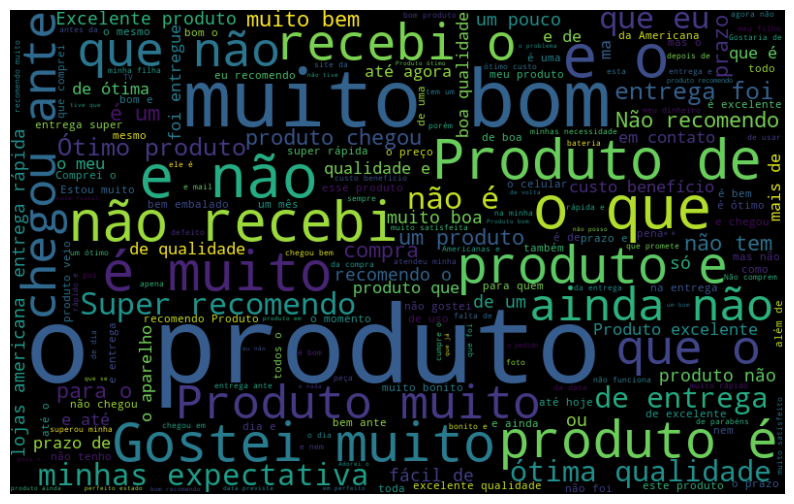

In [60]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
def word_cloud_negativo(dados, coluna_texto):
    avaliacoes_negativas = dados.query('polarity == 0')
    avaliacoes = [texto for texto in avaliacoes_negativas[coluna_texto]]
    palavras = ' '.join(avaliacoes)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [62]:
def word_cloud_positivo(dados, coluna_texto):
    avaliacoes_negativas = dados.query('polarity == 1')
    avaliacoes = [texto for texto in avaliacoes_negativas[coluna_texto]]
    palavras = ' '.join(avaliacoes)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

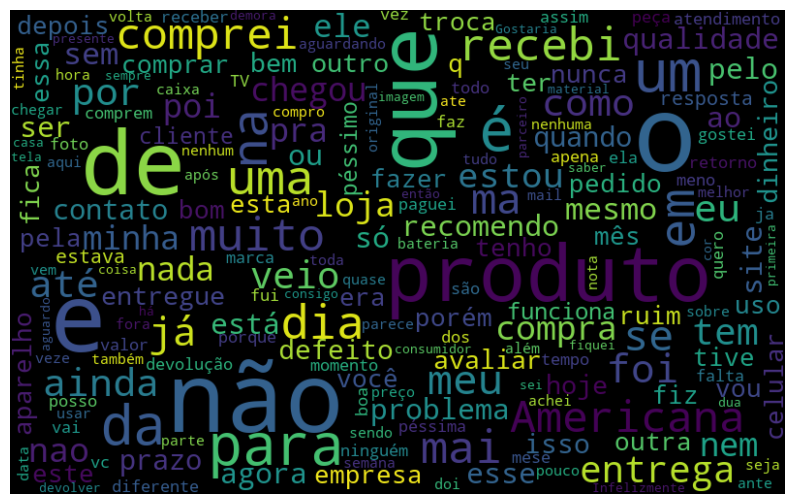

In [63]:
word_cloud_negativo(dataset, 'review_text')

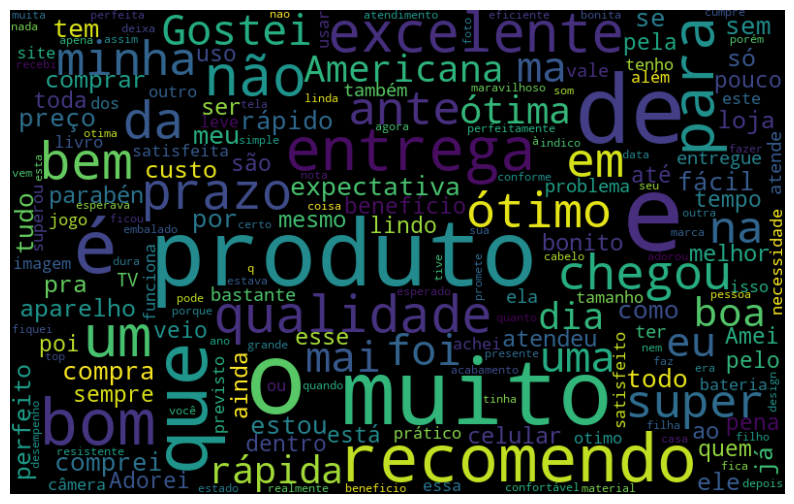

In [64]:
word_cloud_positivo(dataset, 'review_text')